<a href="https://colab.research.google.com/github/AshrafalKhalique/ENCRYPTIX-/blob/main/Intern_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [14]:
# Load the dataset with a specified encoding
data_path = '/content/drive/MyDrive/Internship/Task4_SpamSMS/spam.csv'  # Replace with your actual path
df = pd.read_csv(data_path, encoding='latin1')  # You can try 'latin1', 'iso-8859-1', or 'cp1252'

# Display the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Pre-processing**

In [16]:
#dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Label Encoding the Target Variable**

In [17]:
# Encoding the target variable
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

# 0 represents 'ham' and 1 represents 'spam'
print(df['target'].value_counts())

target
0    4825
1     747
Name: count, dtype: int64


**Text Preprocessing**

In [18]:
import re
import string

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove whitespace
    text = text.strip()
    return text

# Apply text preprocessing
df['text'] = df['text'].apply(preprocess_text)

# **EDA and Visualizations**

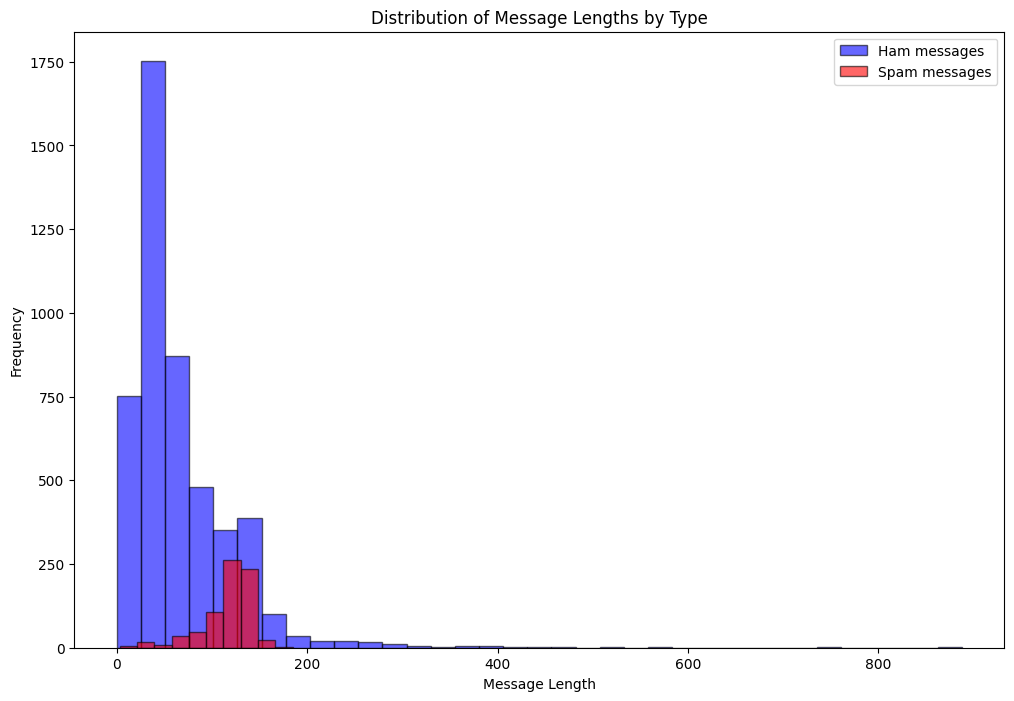

In [61]:
# Create a new column for message length
df['message_len'] = df['text'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(12, 8))
df[df.target == 0].message_len.plot(bins=35, kind='hist', color='blue',
                                    label='Ham messages', alpha=0.6,  edgecolor = "black")
df[df.target == 1].message_len.plot(kind='hist', color='red',
                                    label='Spam messages', alpha=0.6, edgecolor = "black")
plt.legend()
plt.xlabel("Message Length")
plt.title("Distribution of Message Lengths by Type")
plt.show()

# **Model Analysis**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

**TF-IDF Vectorization**

In [43]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Vectorizing the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Naive Bayes Classifier**

Naive Bayes Classifier:
Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



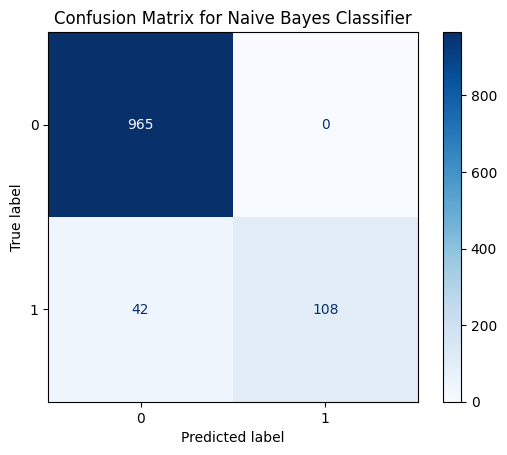

In [45]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluating the model
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

**Logistic Regression**

Logistic Regression:
Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



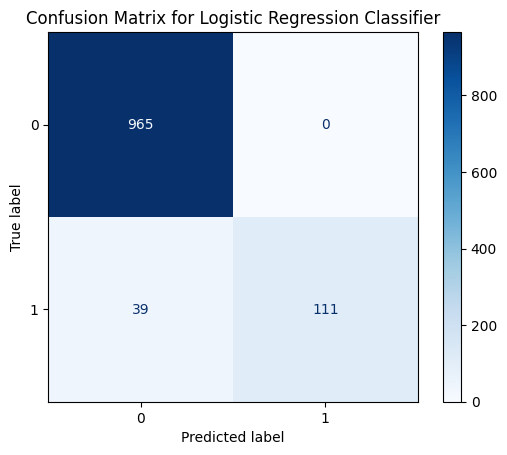

In [46]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluating the model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

**Support Vector Machine**

Support Vector Machine:
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



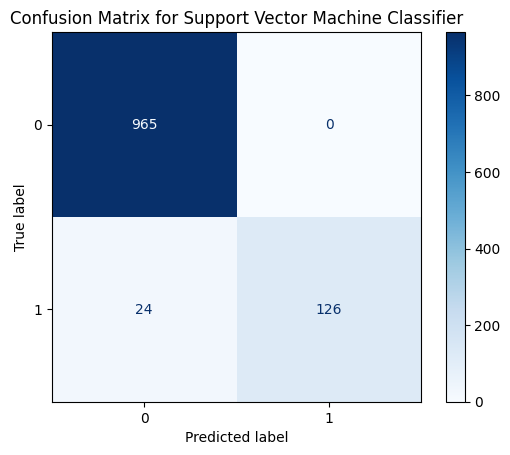

In [47]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluating the model
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

**Gradaientt Boosting**

Gradient Boosting Classifier:
Accuracy: 0.9695067264573991
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



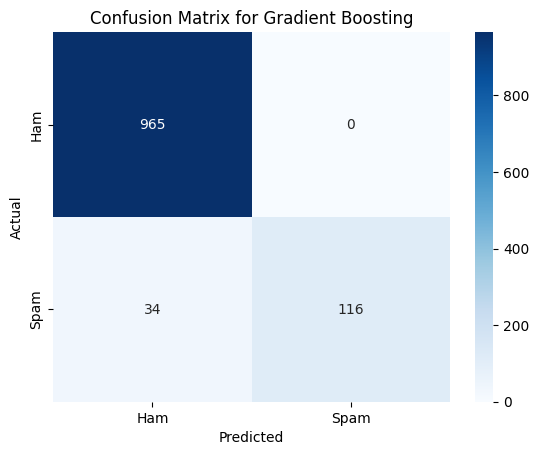

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluating the model
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
conf_mat_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_mat_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

**Decision Tree**

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.86      0.85      0.85       150

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115



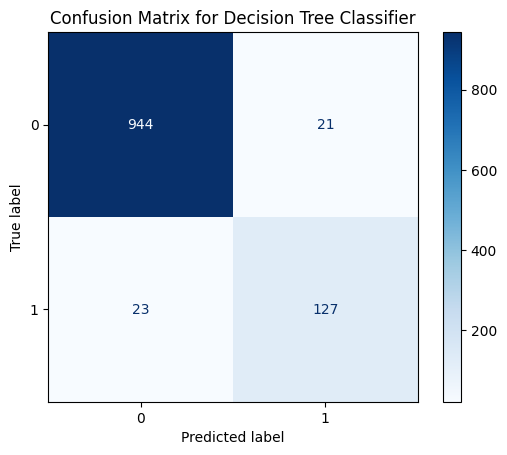

In [63]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)

# Classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

**Random Forest**

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



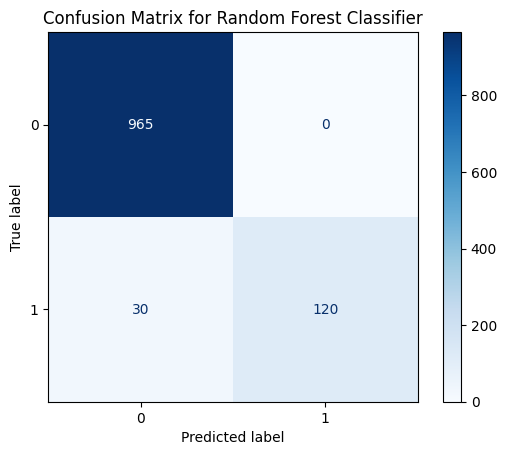

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


# **Evaluate and Compare Models**

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate all models
models = {
    'Support Vector Machine': svm_model,
    'Naive Bayes Classifier': nb_model,
    'Logistic Regression': lr_model,
    'Gradient Boosting Classifier': gb_model,
    'Decision Tree': dt,
    'Random Forest': rf
}

results = {}
for name, model in models.items():
    # Ensure the test data is transformed using TF-IDF
    X_test_transformed = tfidf.transform(X_test)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_transformed, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print(results_df)

# Identify the best performing model based on F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"Best Performing Model: {best_model_name}")


                              Accuracy  Precision    Recall  F1 Score
Support Vector Machine        0.978475   0.978998  0.978475  0.977672
Naive Bayes Classifier        0.962332   0.963903  0.962332  0.959667
Logistic Regression           0.965022   0.966381  0.965022  0.962756
Gradient Boosting Classifier  0.969507   0.970545  0.969507  0.967822
Decision Tree                 0.960538   0.960326  0.960538  0.960426
Random Forest                 0.973094   0.973905  0.973094  0.971805
Best Performing Model: Support Vector Machine
